In [45]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

display(HTML("<style>.container { width:95% !important; }</style>"))

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tqdm.auto import tqdm

# Japanese font installation
# 1) `$ mkdir $HOME/.fonts`
# 2) Download Osaka.ttf tp $HOME/.fonts/
# 3) `$ fc-cache`
# 4) (optional) Clear matplotlib cache dir, find the dir with `matplotlib.get_cachedir()`
# plt.rcParams['font.family'] = 'Osaka'

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set_style("ticks")

np.set_printoptions(suppress=True)
plt.rcParams['figure.figsize'] = (8.0, 5.0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load benchmark data

In [2]:
DATA_DIR = "../data"

In [3]:
import os

def name_to_id(name):
    return name.lower().replace(" ", "_")

def get_data_file(row):
    fund_name = name_to_id(row["name"])
    filename = f'20200504_{row["morning_star_id"]}_{fund_name}_{row["type"]}.json'
    return filename


bemchmark_master_df = pd.read_csv(os.path.join(DATA_DIR, "morning_star_fund_benchmark.csv"))
bemchmark_master_df["data_file"] = bemchmark_master_df.apply(get_data_file, axis=1)
bemchmark_master_df

,morning_star_id,name,type,country,data_file
0,THCA000003,Mid-Long Term Bond,category,TH,20200504_THCA000003_mid-long_term_bond_category.json
1,FOUSA06TOI,ThaiBMA Composite Bond TR THB,index,TH,20200504_FOUSA06TOI_thaibma_composite_bond_tr_thb_index.json
2,THCA000013,Global Bond,category,TH,20200504_THCA000013_global_bond_category.json
3,F0GBR0585V,PIMCO GIS Total Return Bond,index,UK,20200504_F0GBR0585V_pimco_gis_total_return_bond_index.json
4,THCA000002,Equity Large-Cap,category,TH,20200504_THCA000002_equity_large-cap_category.json
5,FOUSA08875,SET 50 TR THB,index,TH,20200504_FOUSA08875_set_50_tr_thb_index.json
6,THCA000027,US Equity,category,TH,20200504_THCA000027_us_equity_category.json
7,XIUSA000RN,MSCI US,index,TH,20200504_XIUSA000RN_msci_us_index.json
8,THCA000030,EU Equity,category,TH,20200504_THCA000030_eu_equity_category.json
9,XIUSA000PL,MSCI EU,index,TH,20200504_XIUSA000PL_msci_eu_index.json


In [4]:
pd.read_json(os.path.join(DATA_DIR, "morningstar_benchmark", "20200504_XIUSA000PL_msci_eu_index.json"), orient="records", lines=True)

,date,cum_return,name,morning_star_id
0,2000-01-01,0.000,MSCI EU,XIUSA000PL
1,2000-01-02,0.000,MSCI EU,XIUSA000PL
2,2000-01-03,-1.610,MSCI EU,XIUSA000PL
3,2000-01-04,-1.130,MSCI EU,XIUSA000PL
4,2000-01-05,-1.040,MSCI EU,XIUSA000PL
...,...,...,...,...
7424,2020-04-29,41.000,MSCI EU,XIUSA000PL
7425,2020-04-30,38.910,MSCI EU,XIUSA000PL
7426,2020-05-01,38.340,MSCI EU,XIUSA000PL
7427,2020-05-02,38.340,MSCI EU,XIUSA000PL


In [5]:
fund_info = {}

for ind, row in bemchmark_master_df.iterrows():
    fund_id = name_to_id(row["name"])
    data_file = row["data_file"]
    print(ind, os.path.join(DATA_DIR, "morning_star_benchmark", row["data_file"]))
    fund_info[fund_id] = pd.read_json(os.path.join(DATA_DIR, "morningstar_benchmark", data_file), orient="records", lines=True)

0 ../data/morning_star_benchmark/20200504_THCA000003_mid-long_term_bond_category.json
1 ../data/morning_star_benchmark/20200504_FOUSA06TOI_thaibma_composite_bond_tr_thb_index.json
2 ../data/morning_star_benchmark/20200504_THCA000013_global_bond_category.json
3 ../data/morning_star_benchmark/20200504_F0GBR0585V_pimco_gis_total_return_bond_index.json
4 ../data/morning_star_benchmark/20200504_THCA000002_equity_large-cap_category.json
5 ../data/morning_star_benchmark/20200504_FOUSA08875_set_50_tr_thb_index.json
6 ../data/morning_star_benchmark/20200504_THCA000027_us_equity_category.json
7 ../data/morning_star_benchmark/20200504_XIUSA000RN_msci_us_index.json
8 ../data/morning_star_benchmark/20200504_THCA000030_eu_equity_category.json
9 ../data/morning_star_benchmark/20200504_XIUSA000PL_msci_eu_index.json
10 ../data/morning_star_benchmark/20200504_THCA000010_emerging_market_equity_category.json
11 ../data/morning_star_benchmark/20200504_XIUSA04F2P_msci_em_index.json
12 ../data/morning_star_b

## Visualize cumulative return

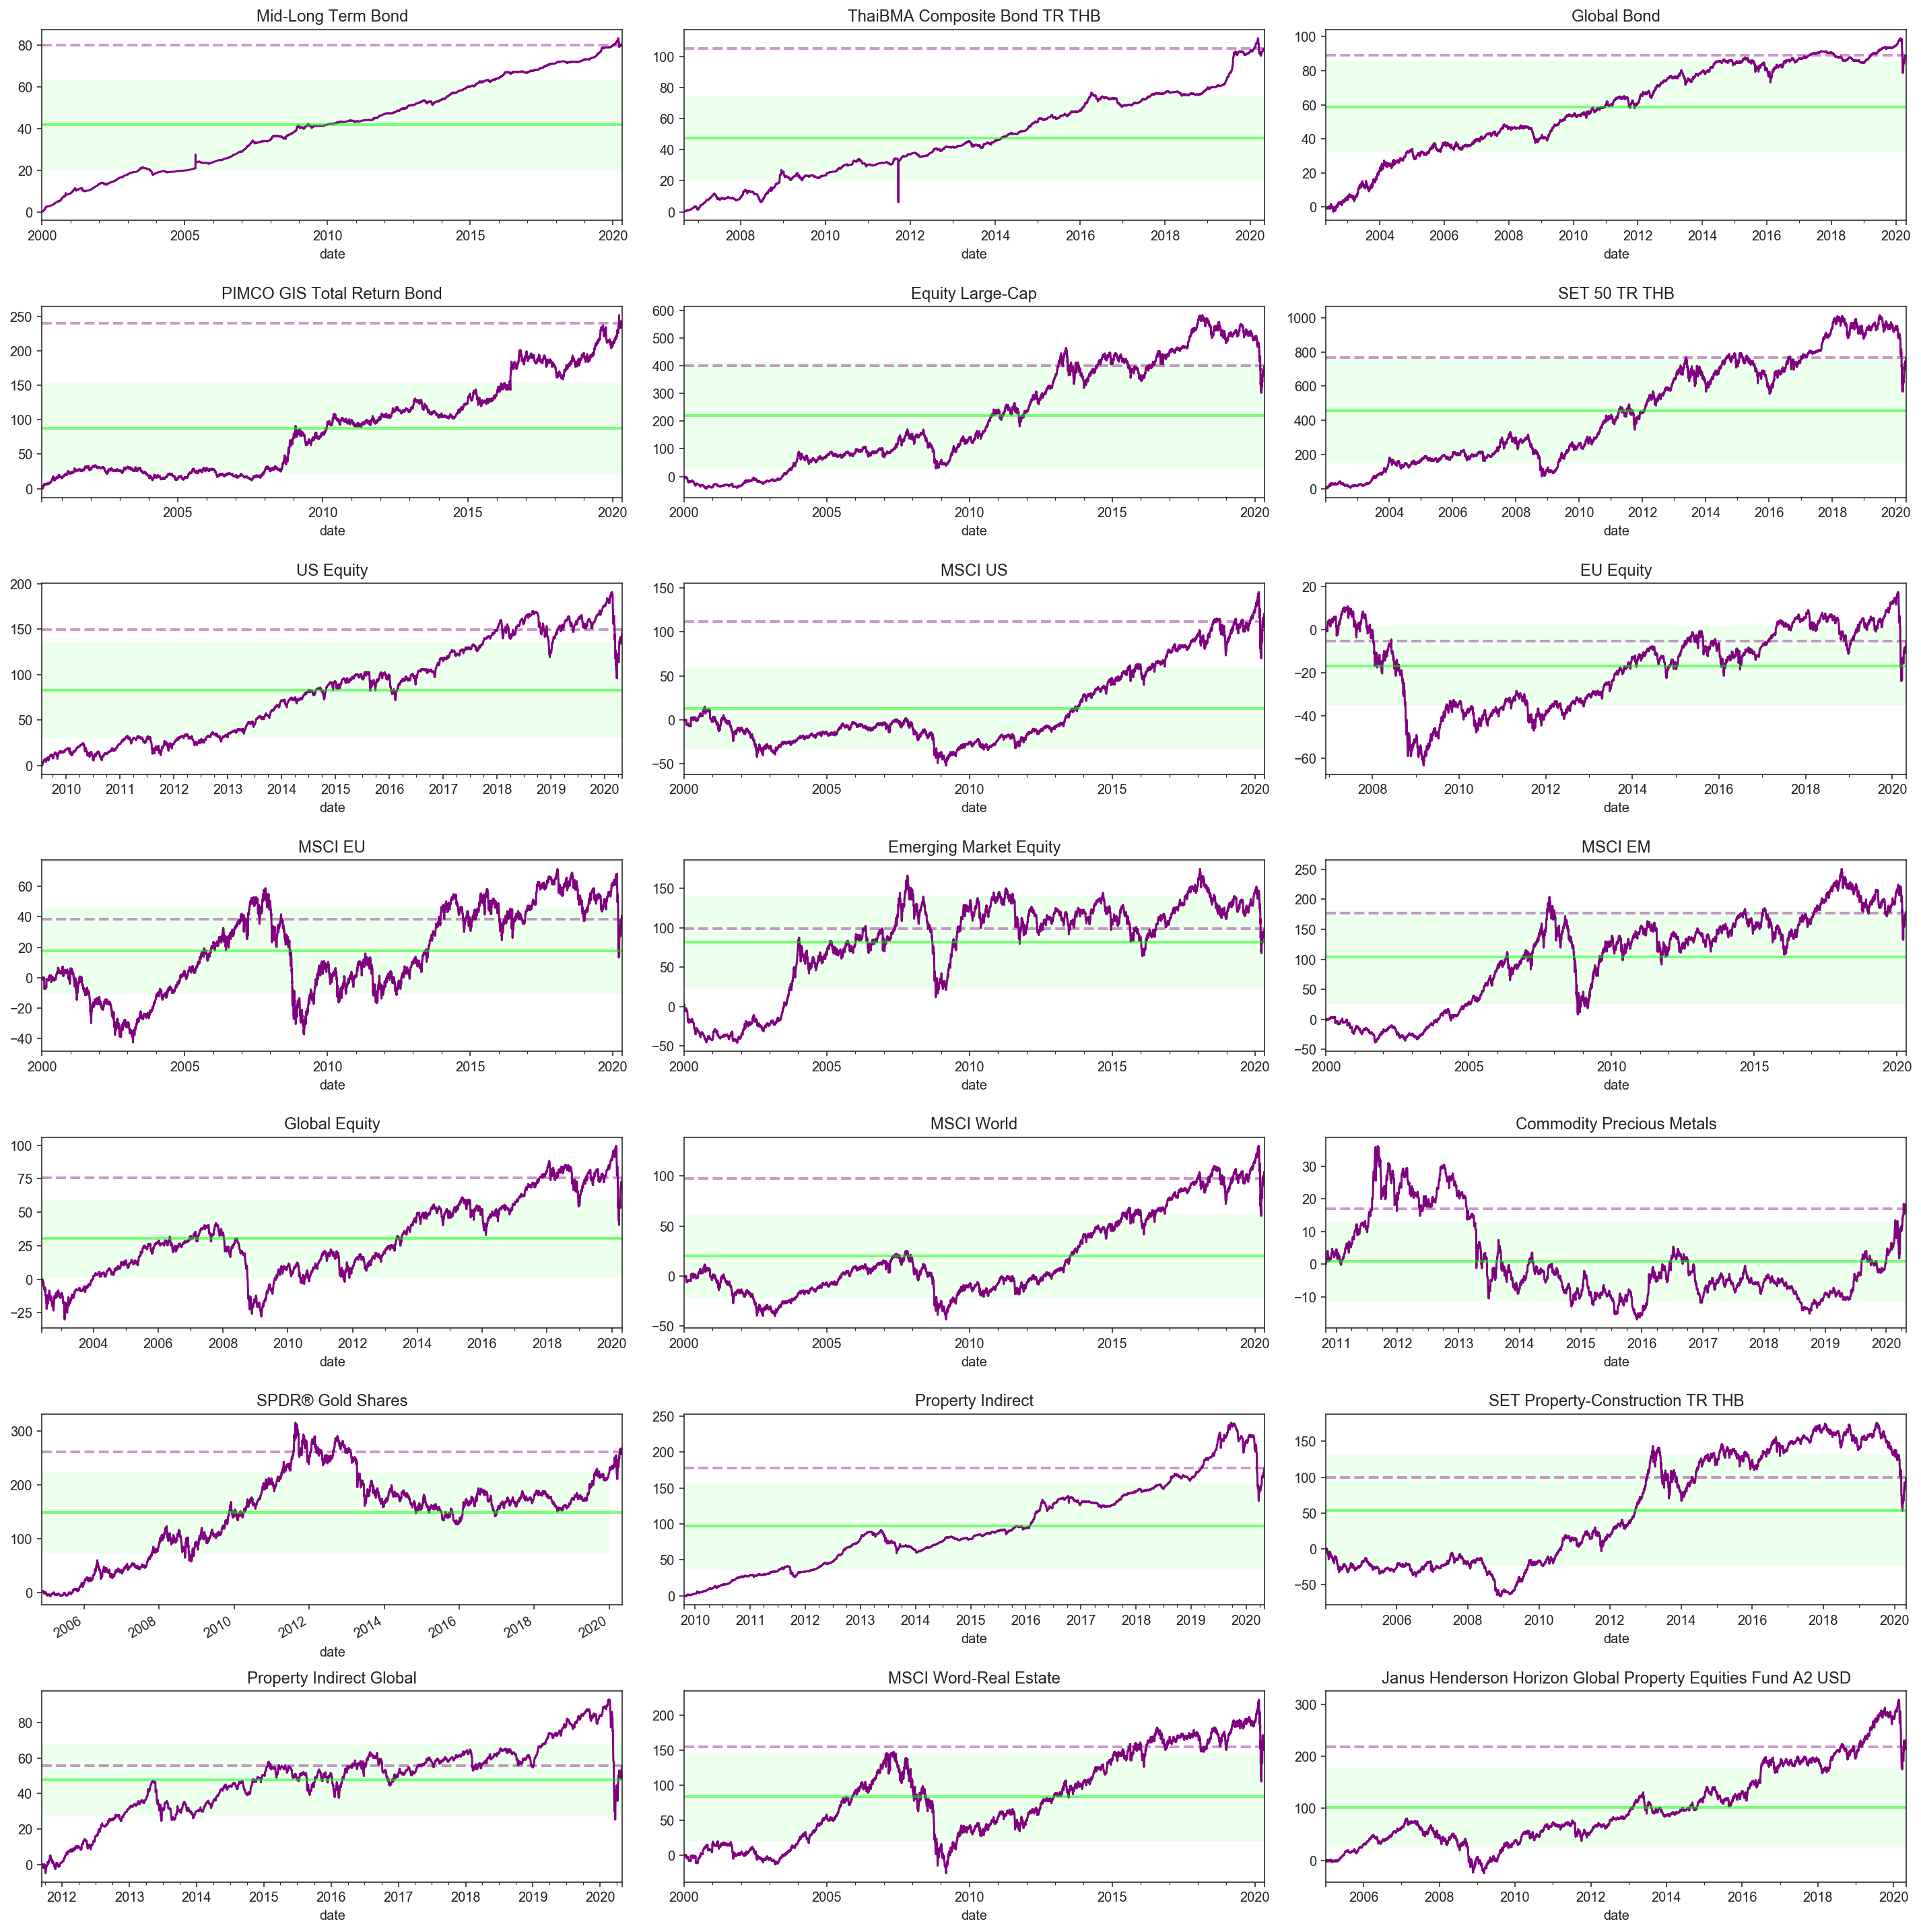

In [9]:
import sys
sys.path.append("..")
from libs.plot_utils import *
    

fig, axs = plt.subplots(7,3, figsize=(20, 20))

c = 0
all_fund_type = list(fund_info.keys())
for i in range(len(axs)):
    for j in range(len(axs[0])):
        ax = axs[i, j]
        curr_df = fund_info[all_fund_type[c]]
        _ = nav_plot(curr_df, ax=axs[i][j])
        c += 1

fig.tight_layout()

# Risk profile

In [10]:
fund_info.keys()

dict_keys(['mid-long_term_bond', 'thaibma_composite_bond_tr_thb', 'global_bond', 'pimco_gis_total_return_bond', 'equity_large-cap', 'set_50_tr_thb', 'us_equity', 'msci_us', 'eu_equity', 'msci_eu', 'emerging_market_equity', 'msci_em', 'global_equity', 'msci_world', 'commodity_precious_metals', 'spdr_gold', 'property_indirect', 'set_property-construction_tr_thb', 'property_indirect_global', 'msci_word-real_estate', 'janus_henderson_horizon_global_property_equities_fund_a2_usd'])

In [89]:
target_fund = {
    "bond": "mid-long_term_bond",
    "global_bond": "pimco_gis_total_return_bond",
    "set50": "equity_large-cap",
    "s&p500": "msci_us",
    "eu": "msci_eu",
    "em": "emerging_market_equity",
    #"global_eq": "msci_world",
    "gold": "spdr_gold",
    "th_reit": "property_indirect",
    "global_reit": "janus_henderson_horizon_global_property_equities_fund_a2_usd"
}

In [90]:
all_start = []

for cat_name, fund_key in target_fund.items():
    print(fund_info[fund_key].date.min(), fund_key)
    all_start.append(fund_info[fund_key].date.min())
    
"Minimum start", max(all_start)

2000-01-01 00:00:00 mid-long_term_bond
2000-04-25 00:00:00 pimco_gis_total_return_bond
2000-01-01 00:00:00 equity_large-cap
2000-01-01 00:00:00 msci_us
2000-01-01 00:00:00 msci_eu
2000-01-01 00:00:00 emerging_market_equity
2004-11-18 00:00:00 spdr_gold
2009-10-19 00:00:00 property_indirect
2005-01-03 00:00:00 janus_henderson_horizon_global_property_equities_fund_a2_usd


('Minimum start', Timestamp('2009-10-19 00:00:00'))

In [118]:
dca_year = 5

#start = "2009-10-19"
start = "2005-10-19"

weight = {
    "bond": 0.13,
    "global_bond": 0.07,
    "set50": 0.15,
    "s&p500": 0.35,
    "eu": 0.0,
    "em": 0.05,
    "gold": 0.05,
    "th_reit": 0.15,
    "global_reit": 0.05
}

sum(weight.values())

1.0

In [119]:
from datetime import datetime, timedelta


total_return_data = {"start": [], "end": []}
for suffix in ["_first", "_last", "_return"]:
    for k in weight:
        total_return_data[k+suffix] = []

#crisis_day = "2020-02-01"
crisis_day = "2020-12-01"

curr_start = datetime.strptime(start, "%Y-%m-%d")

while True:
    curr_start_str = datetime.strftime(curr_start, "%Y-%m-%d")
    end = curr_start + timedelta(days=365*dca_year)
    end_str = min(crisis_day, datetime.strftime(end, "%Y-%m-%d"))

    not_enough_data = False
    for k in weight:
        target_df = fund_info[target_fund[k]]
        target_df = target_df[(target_df.date >= curr_start_str) & (target_df.date <= end_str)].reset_index(drop=True)
        
        if k == "th_reit" and len(target_df) <= 365*dca_year-(2*4*12*dca_year)-60*dca_year:
            total_return_data[k+"_return"].append(0)
            total_return_data[k+"_first"].append(0)
            total_return_data[k+"_last"].append(0)
        else:
            if len(target_df) <= 365*dca_year-(2*4*12*dca_year)-60*dca_year:
                print(k, len(target_df), curr_start_str, end_str, end)
                not_enough_data = True

            base_val = target_df["cum_return"].iloc[0]
            last_val = target_df["cum_return"].iloc[-1]
            fund_return = (last_val - base_val)/(base_val/100+1)
            annualized_fund_return = ((1+fund_return/100)**(1/dca_year) - 1)*100
            total_return_data[k+"_return"].append(annualized_fund_return)
            total_return_data[k+"_first"].append(base_val)
            total_return_data[k+"_last"].append(last_val)
        
    total_return_data["start"].append(curr_start_str)
    total_return_data["end"].append(end_str)
    
    curr_start = curr_start + timedelta(days=1)
    
    if not_enough_data:
        break

gold 1045 2016-03-17 2020-12-01 2021-03-16 00:00:00


# 1 year

<Figure size 576x360 with 0 Axes>

count   5015.000
mean       7.444
std        9.118
min      -25.138
25%        3.800
50%        8.073
75%       12.481
max       39.886
Name: weighted_return, dtype: float64

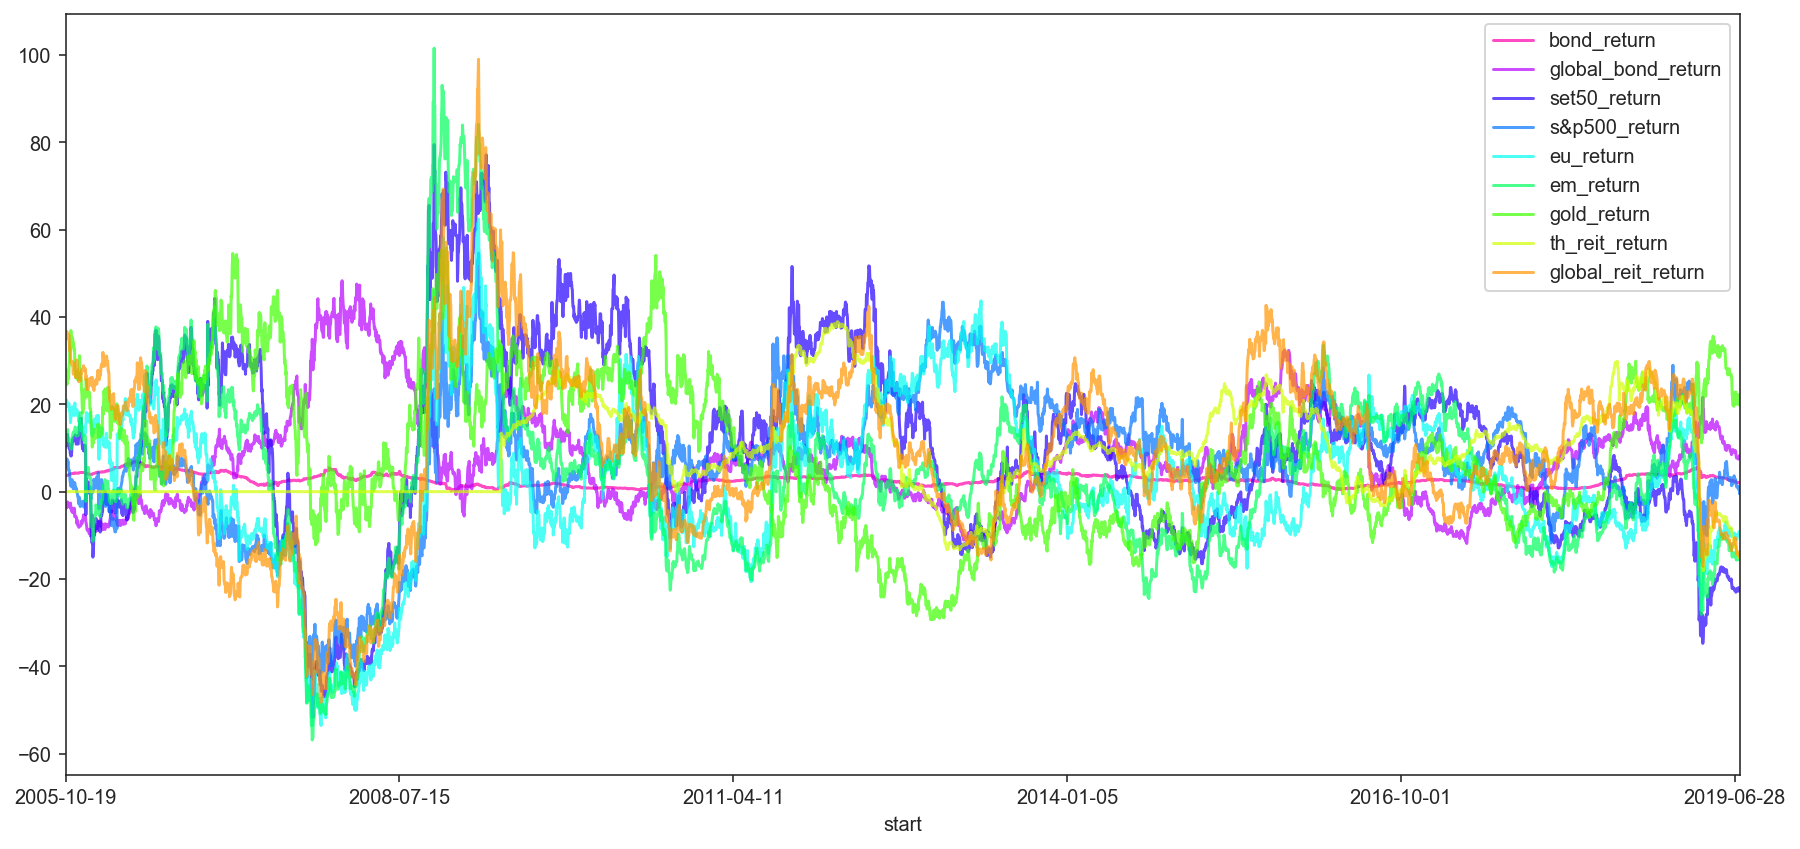

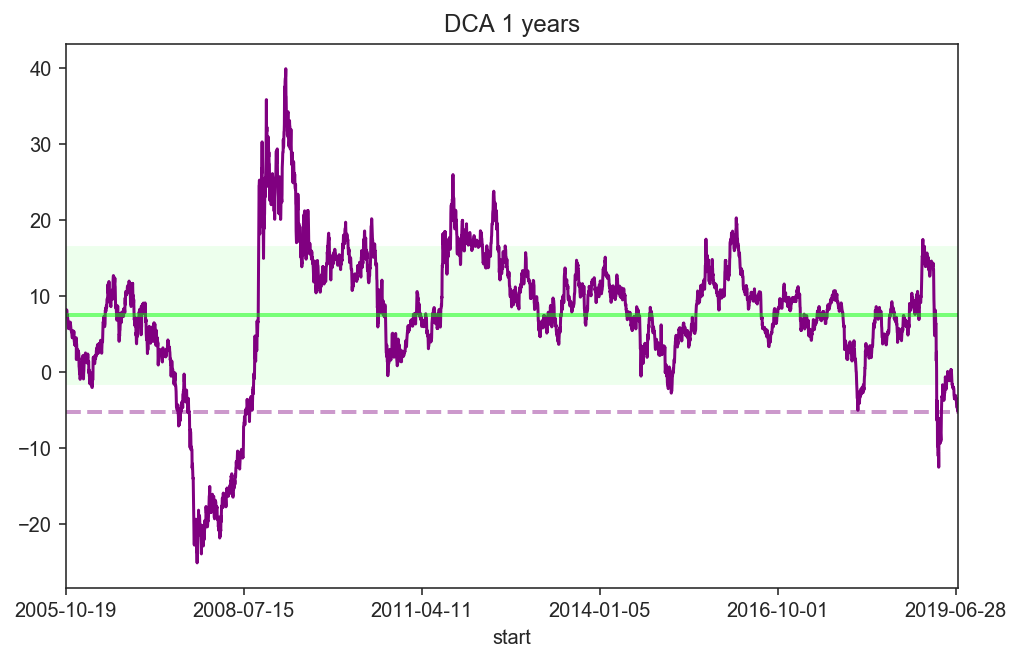

In [117]:
total_return_df = pd.DataFrame(total_return_data)
total_return_df.plot(x="start", 
                     y=[k+"_return" for k in weight.keys()], 
                     figsize=(15, 7), alpha=0.7,
                     colors=sns.color_palette("hsv_r", len(weight.keys())))

def get_weighted_return(row):
    weighted_return = 0
    
    for k in weight:
        weighted_return += weight[k]*row[k+"_return"]
    
    return weighted_return

total_return_df["name"] = f"DCA {dca_year} years"
total_return_df["weighted_return"] = total_return_df.apply(get_weighted_return, axis=1)

plt.figure()
ax = nav_plot(total_return_df, x_col="start", y_col="weighted_return")
total_return_df["weighted_return"].describe()

# 3 years

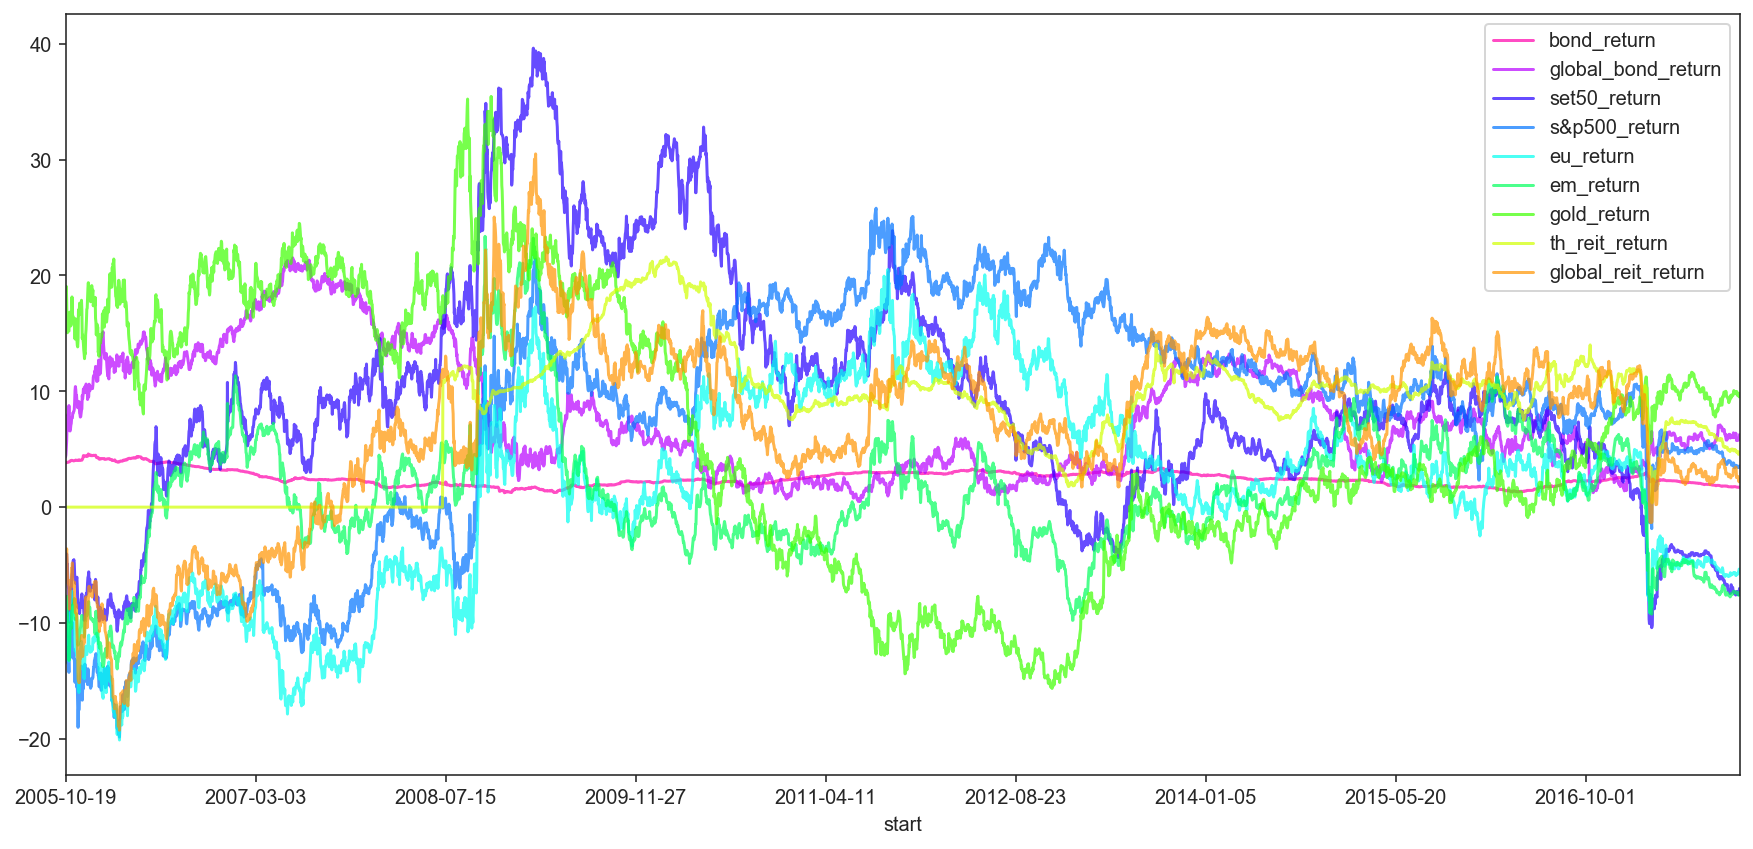

In [113]:
total_return_df = pd.DataFrame(total_return_data)
total_return_df.plot(x="start", 
                     y=[k+"_return" for k in weight.keys()], 
                     figsize=(15, 7), alpha=0.7,
                     colors=sns.color_palette("hsv_r", len(weight.keys())))

count   4406.000
mean       6.870
std        4.952
min       -7.626
25%        3.452
50%        7.643
75%       10.332
max       19.280
Name: weighted_return, dtype: float64

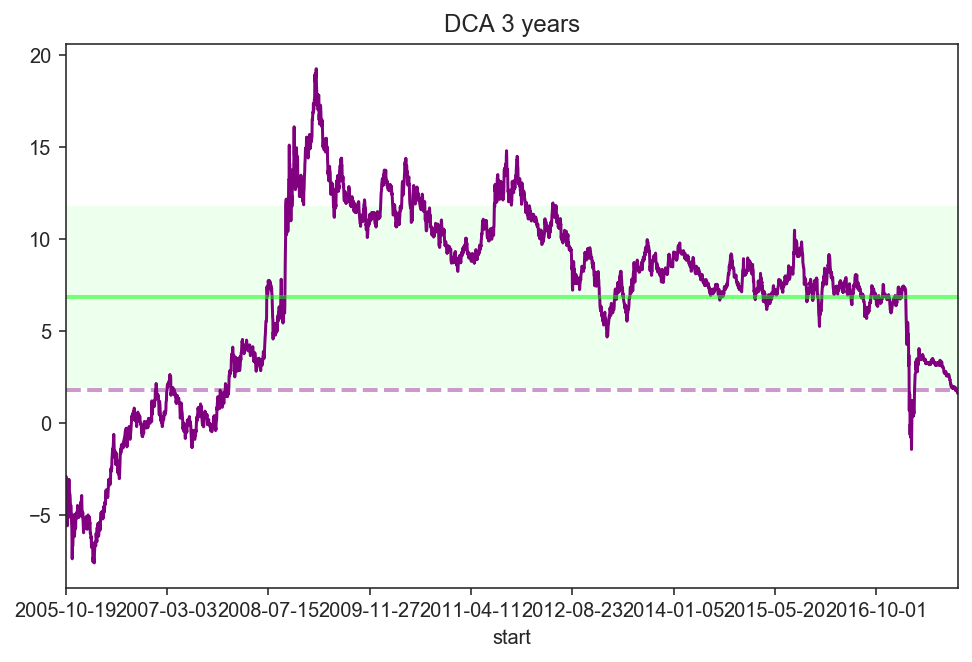

In [114]:
def get_weighted_return(row):
    weighted_return = 0
    
    for k in weight:
        weighted_return += weight[k]*row[k+"_return"]
    
    return weighted_return

total_return_df["name"] = f"DCA {dca_year} years"
total_return_df["weighted_return"] = total_return_df.apply(get_weighted_return, axis=1)

ax = nav_plot(total_return_df, x_col="start", y_col="weighted_return")
total_return_df["weighted_return"].describe()

In [108]:
total_return_df[["start", "end", "weighted_return"] + [k+"_return" for k in weight.keys()]]

,start,end,weighted_return,bond_return,global_bond_return,set50_return,s&p500_return,eu_return,em_return,gold_return,th_reit_return,global_reit_return
0,2005-10-19,2008-10-18,-3.737,3.810,4.317,-4.542,-11.759,-8.561,-8.175,18.551,0.000,-5.127
1,2005-10-20,2008-10-19,-3.522,3.813,4.499,-4.414,-11.267,-8.618,-8.057,18.860,0.000,-5.350
2,2005-10-21,2008-10-20,-2.907,3.838,5.062,-4.242,-9.924,-7.737,-7.785,19.054,0.000,-4.284
3,2005-10-22,2008-10-21,-3.148,3.845,5.714,-4.042,-10.778,-8.122,-7.690,17.900,0.000,-3.597
4,2005-10-23,2008-10-22,-3.996,3.863,7.009,-4.947,-12.478,-10.208,-8.845,15.625,0.000,-4.364
...,...,...,...,...,...,...,...,...,...,...,...,...
4401,2017-11-06,2020-11-05,1.657,1.725,5.835,-7.546,3.421,-5.772,-7.513,9.660,4.794,2.644
4402,2017-11-07,2020-11-06,1.622,1.703,5.883,-7.503,3.421,-5.598,-7.607,9.793,4.574,2.438
4403,2017-11-08,2020-11-07,1.591,1.705,5.819,-7.551,3.417,-5.577,-7.606,9.666,4.555,2.236
4404,2017-11-09,2020-11-08,1.677,1.713,5.887,-7.313,3.546,-5.348,-7.587,9.516,4.620,2.182


# 5 years

<Figure size 576x360 with 0 Axes>

count   3803.000
mean       7.567
std        2.988
min        1.345
25%        4.986
50%        7.579
75%        9.596
max       15.683
Name: weighted_return, dtype: float64

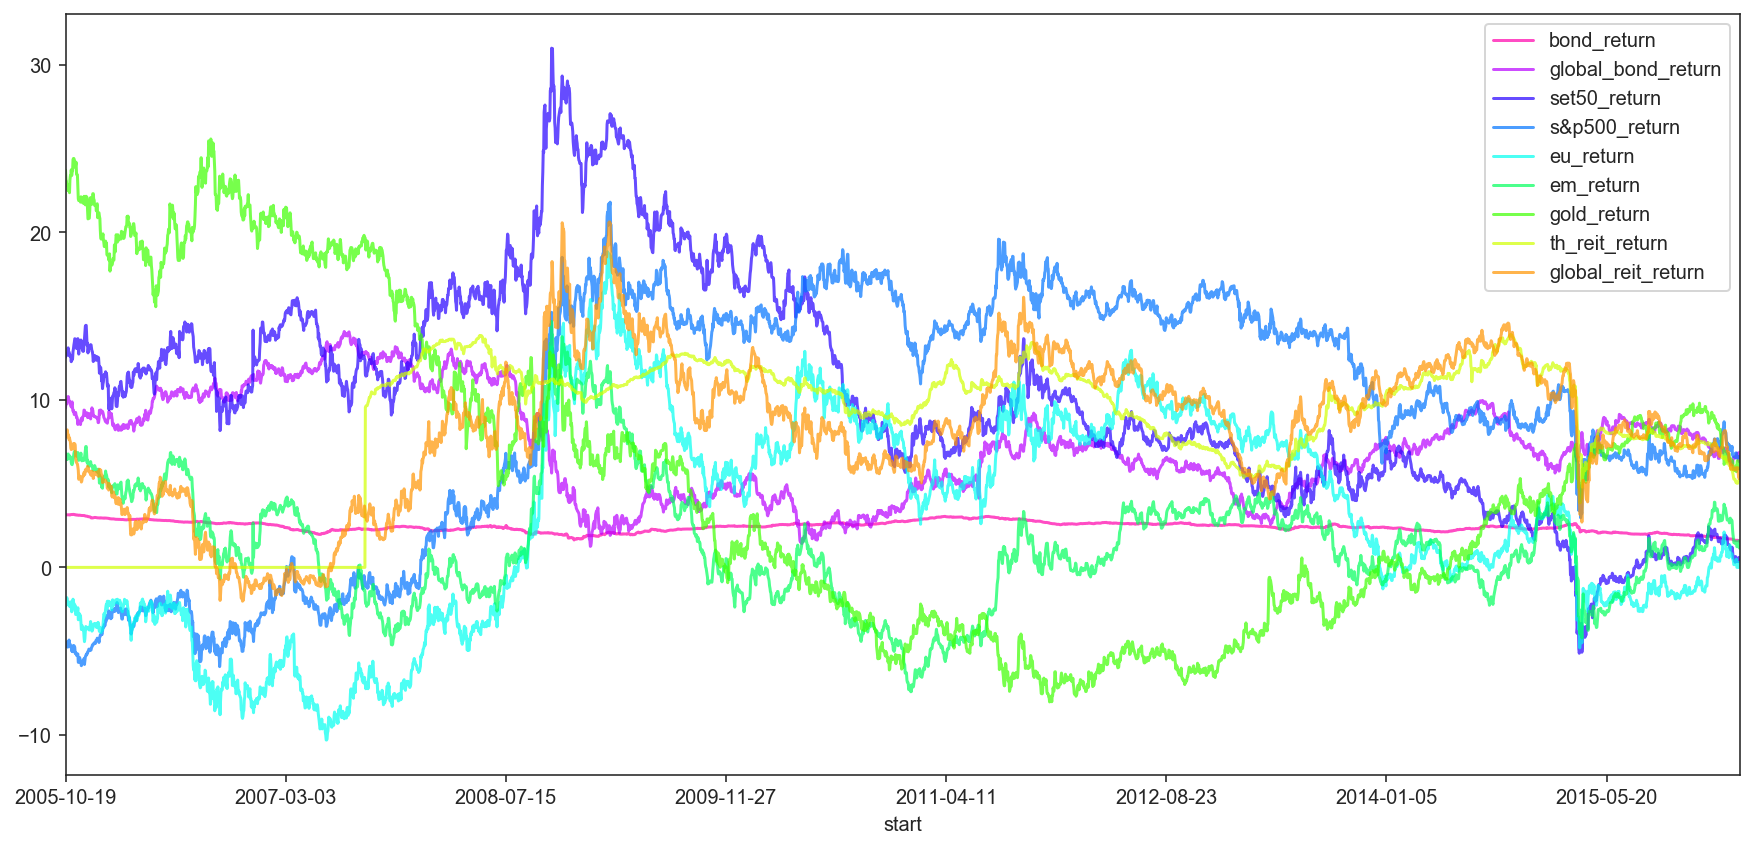

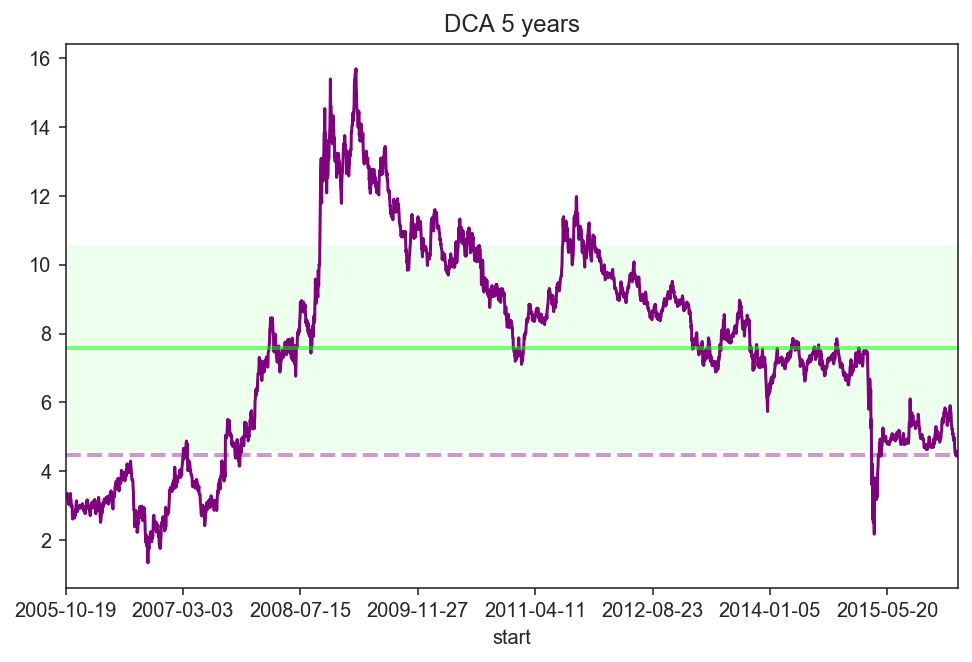

In [120]:
total_return_df = pd.DataFrame(total_return_data)
total_return_df.plot(x="start", 
                     y=[k+"_return" for k in weight.keys()], 
                     figsize=(15, 7), alpha=0.7,
                     colors=sns.color_palette("hsv_r", len(weight.keys())))

def get_weighted_return(row):
    weighted_return = 0
    
    for k in weight:
        weighted_return += weight[k]*row[k+"_return"]
    
    return weighted_return

total_return_df["name"] = f"DCA {dca_year} years"
total_return_df["weighted_return"] = total_return_df.apply(get_weighted_return, axis=1)

plt.figure()
ax = nav_plot(total_return_df, x_col="start", y_col="weighted_return")
total_return_df["weighted_return"].describe()